**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



## Importing libraries and setting up the environment

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def print_images(labels, images, _figsize=(10, 10)):
    """
        Function to plot a set of images
    :param labels: the labels
    :param images: the images
    :param _figsize: the size of the figure
    :return: None
    """
    # assert labels.shape == images.shape
    f, axarr = plt.subplots(labels.shape[0], labels.shape[1], figsize=_figsize)

    rows, cols = labels.shape
    # Check the dimension of axarr and adjust accordingly
    if rows == 1 and cols == 1:
        axarr = np.array([[axarr]])  # Convert to 2D array
    elif rows == 1 or cols == 1:
        axarr = axarr.reshape(rows, cols)  # Convert to 2D array

    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            axarr[i, j].set_title(labels[i, j])
            axarr[i, j].imshow(images[i, j], cmap='gray', vmin=0, vmax=255)

def _padding(img, kernel_size):
    """
        Function to pad an image with zeros based on the kernel size
    :param img: the image to be padded
    :param kernel_size: tuple (m, n). Remember m = 2a +1, n = 2b + 1
    :return: the padded image
    """
    pad_ud = int((kernel_size[0] - 1) / 2)
    pad_lr = int((kernel_size[1] - 1) / 2)
    l_img = np.pad(img, ((pad_ud, pad_ud), (pad_lr, pad_lr)), 'constant', constant_values=0)
    return l_img

def convolution(img, kernel):
    """
        Function to apply convolution to an image
    :param img: the image to be convoluted
    :param kernel: the kernel to be used
    :return: the convoluted image
    """
    # get the kernel size
    k1, k2 = kernel.shape
    # get the image size
    i1, i2 = img.shape
    # create a new image with the same size of the original
    new_img = np.zeros((i1, i2))
    # pad the image ( I am considering symmetric padding - square kernel)
    l_padded = _padding(img, kernel.shape)
    # apply convolution
    for i in range(i1):
        for j in range(i2):
            new_img[i, j] = np.sum(l_padded[i:i + k1, j:j + k2] * kernel)

    return new_img

In [23]:
def sobel_kernels():
    """
        Function to return the sobel kernel
    :return: the sobel kernels vertical and horizontal
    """
    return np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]]) , np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]]) ,

def gradient(img_1, img_2):
    """
        Function to calculate the gradient magnitude
    :param img_1: first image of gradient
    :param img_2: second image of gradient
    :return: the gradient magnitude
    """
    return np.sqrt(img_1 ** 2 + img_2 ** 2)

def roberts_cross_kernel():
    """
        Function to return the roberts cross kernel
    :return:
    """
    return np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]]), np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
#    return np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]]), np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]])


1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

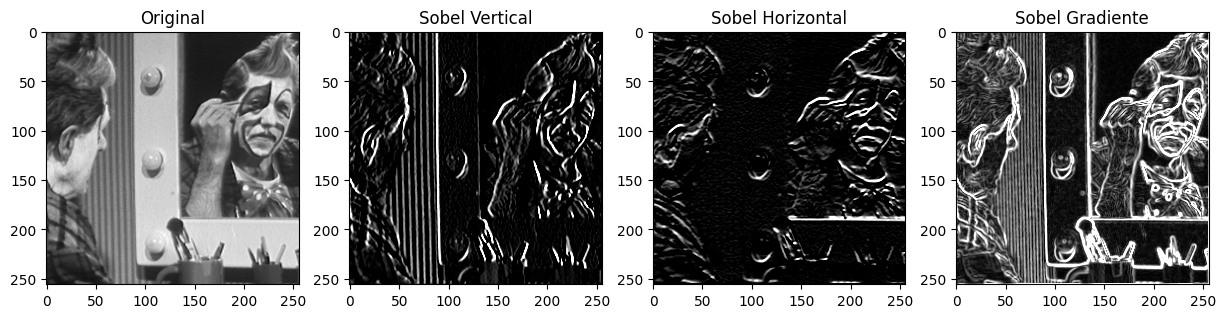

In [24]:
# Sobel Exercise
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

# applying sobel filters
sobel_v, sobel_h = sobel_kernels()
img_sobel_v = convolution(img1, sobel_v)
img_sobel_h = convolution(img1, sobel_h)
img_sobel_grd = gradient(img_sobel_h, img_sobel_v)

# Printing
images = np.array([[img1, img_sobel_v, img_sobel_h, img_sobel_grd]])
labels = np.array([['Original', 'Sobel Vertical', 'Sobel Horizontal', 'Sobel Gradiente']])
print_images(labels, images, _figsize=(15, 15))


### Sobel Solution
![SegmentLocal](cln1sob1.gif "segment")

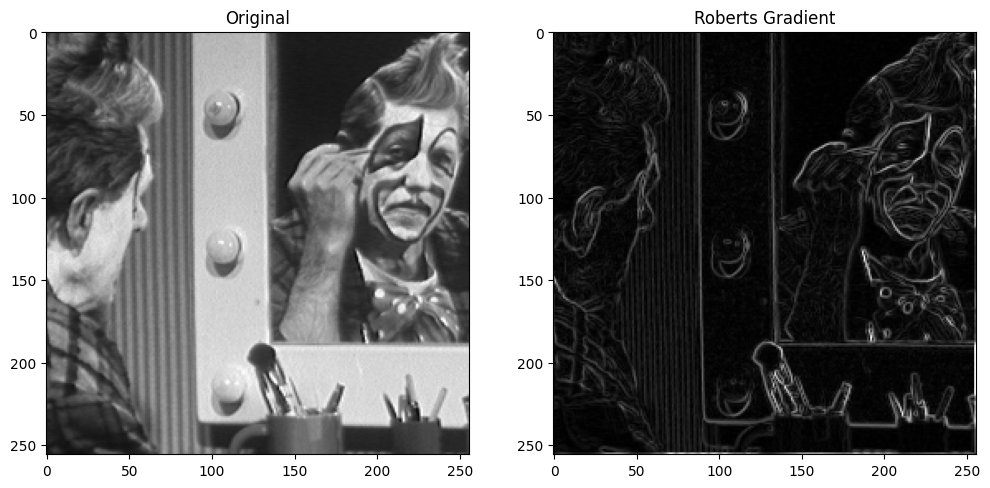

In [25]:
# Roberts Exercise
r1, r2 = roberts_cross_kernel()
img_r1 = convolution(img1, r1)
img_r2 = convolution(img1, r2)
img_rgrad = gradient(img_r1, img_r2)

# Printing
images = np.array([[img1, img_rgrad]])
labels = np.array([['Original', 'Roberts Gradient']])
print_images(labels, images, _figsize=(12, 12))

### Roberts Solution
![SegmentLocal](cln1rob1.gif "segment")

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

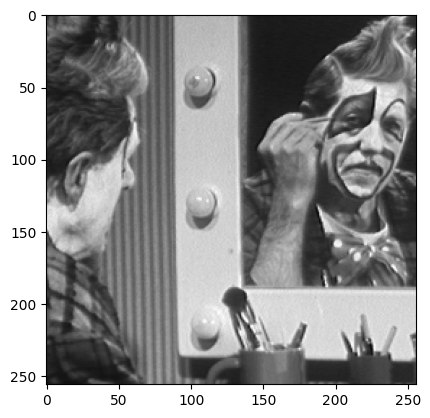

In [58]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

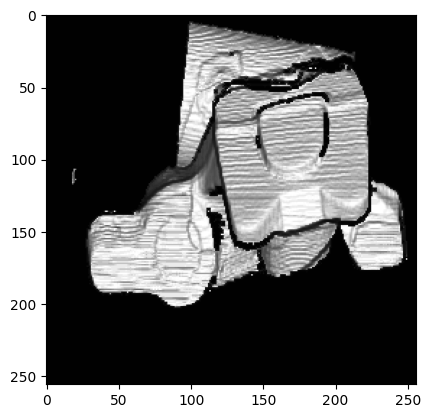

In [59]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

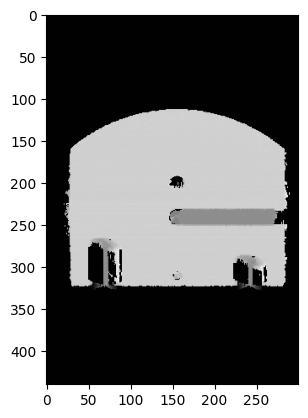

In [60]:

#code here
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

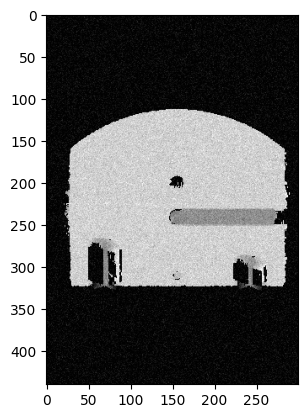

In [ ]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);